# Distance Metric
Many approaches in machine learning require a measure of distance between data points. Traditionally, practitioners would choose a standard distance metric (Euclidean, City-Block, Cosine, etc.) using a priori knowledge of the domain. Here we explore the priori knowledge about how to choose the standard distance metric in different experiment configurations.

Though standard distance metrics are widely used, it is often difficult to design metrics that are well-suited to the particular data and task of interest. That's why scientists introduce the metric learning that aims at automatically constructing task-specific distance metrics from (weakly) supervised data, in a machine learning manner. The learned distance metric can then be used to perform various tasks (e.g., k-NN classification, clustering, information retrieval ...). Here we used KNN algorithm to test various distance metrics' performance on Animals with Attributes (AwA2) dataset.

The properties of a metric:
* non-negativity
* symmetry
* triangle inequality

# Classification
* **Metrics for vector**
    * *Standard-distance Metric*
        * Minkowsky
            * Euclidean distance (p=2)
            * Manhattan distance (p=1)
            * Chebyshev distancem (p= positive infinity)
        * Cosine Similarity
        
    * *Metric Learning:* The metric learning problem is generally formulated as an optimization problem where one seeks to find the parameters of a distance function that optimize some objective function measuring the agreement with the training data.
        * Supervised Metric Learning
            * Large Margin Nearest Neighbor Metric Learning (LMNN) 
            * Neighborhood Components Analysis (NCA)
            * Local Fisher Discriminant Analysis (LFDA)
            * Metric Learning for Kernel Regression (MLKR)
        * Weakly Supervised Metric Learning
            * Information Theoretic Metric Learning (ITML)
            * Sparse High-Dimensional Metric Learning (SDML)
            * Sparse Compositional Metric Learning (SCML)
            * Relative Components Analysis (RCA)
            * Metric Learning with Application for Clustering with Side Information (MMC)
            * Metric Learning from Relative Comparisons by Minimizing Squared Residual (LSML)
            
        * Unsupervised Metric Learning（skip）
            * Covariance
            
            
* **Metrics for distribution (skip)**
    * Earth’s Mover Distance (EMD)
    * Maximum Mean Discrepancy (MMD),
    * KL divergence
    * JD divergence
    * Bregman divergence
    

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics, model_selection
from sklearn.neighbors import KNeighborsClassifier

# Data import

In [2]:
X_features = pd.read_csv(r"Dataset\features\ResNet101\AwA2-features.txt", header=None, sep=' ')
Y_labels = pd.read_csv(r"Dataset\features\ResNet101\AwA2-labels.txt", header=None, sep=' ')
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_features, Y_labels, test_size=0.4,
                                                                        random_state=1234, stratify=Y_labels)

In [3]:
print(X_features.shape,Y_labels.shape)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(37322, 2048) (37322, 1)
(22393, 2048) (14929, 2048) (22393, 1) (14929, 1)


# Preprocessing

In [4]:
from sklearn.decomposition import PCA

### Performance before dimension reduction

In [5]:
# Create KNN Classifier
knn_bdr = KNeighborsClassifier(n_neighbors=5)
# Train the model using the training sets
knn_bdr.fit(X_train, Y_train)
# Predict the response for test dataset
Y_pred_bdr = knn_bdr.predict(X_test)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_bdr))

D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.890950499028736


### Performance after dimension reduction

In [11]:
n_list=[20,30,40,50,100,150,200]
pca_acc_list=[]
for n_components in n_list:
    pca_method = PCA(n_components=n_components)
    pca_method.fit(X_train)
    PCA_reduced_features = pca_method.transform(X_features)
    PCA_reduced_x_train,PCA_reduced_x_test,PCA_reduced_y_train,PCA_reduced_y_test=model_selection.train_test_split(PCA_reduced_features,Y_labels, test_size=0.4,random_state=1234,stratify=Y_labels)
    knn_adr = KNeighborsClassifier(n_neighbors=5)
    knn_adr.fit(PCA_reduced_x_train, PCA_reduced_y_train)
    Y_pred_adr = knn_adr.predict(PCA_reduced_x_test)
    pca_acc_list.append(metrics.accuracy_score(PCA_reduced_y_test, Y_pred_adr))
    print("N_components: ",n_components,"Accuracy:",pca_acc_list[-1])

D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


N_components:  20 Accuracy: 0.8626163842186348


D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


N_components:  30 Accuracy: 0.8826445173822761


D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


N_components:  40 Accuracy: 0.8892089222318976


D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


N_components:  50 Accuracy: 0.8940987340076362


D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


N_components:  100 Accuracy: 0.8999263179047492


D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


N_components:  150 Accuracy: 0.9006631388572577


D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


N_components:  200 Accuracy: 0.9011990086409003


[0.8626163842186348, 0.8826445173822761, 0.8892089222318976, 0.8940987340076362, 0.8999263179047492, 0.9006631388572577, 0.9011990086409003]


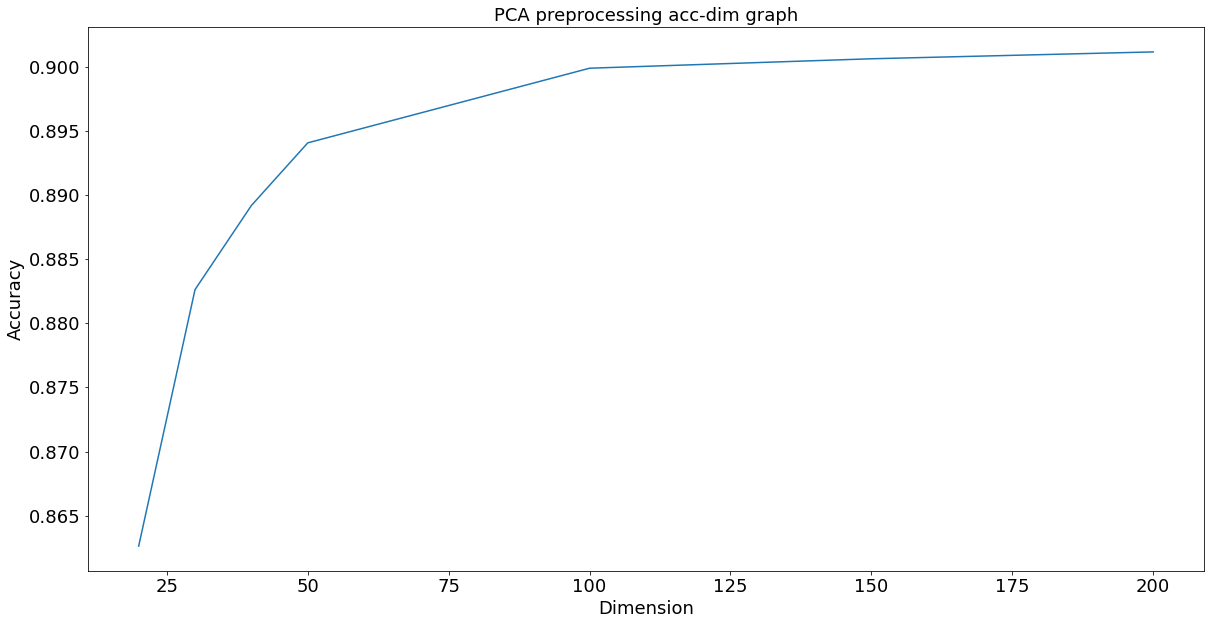

In [31]:
print(pca_acc_list)
plt.figure(figsize=[20,10])
plt.plot(n_list, pca_acc_list)
plt.xlabel("Dimension",fontdict={'size':18})
plt.ylabel("Accuracy",fontdict={'size':18})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("PCA preprocessing acc-dim graph",fontsize=18)
plt.show()

In [16]:
pca_method = PCA(n_components=50)
pca_method.fit(X_train)
PCA_reduced_features = pca_method.transform(X_features)
PCA_reduced_x_train,PCA_reduced_x_test,PCA_reduced_y_train,PCA_reduced_y_test=model_selection.train_test_split(PCA_reduced_features,Y_labels, test_size=0.4,random_state=1234,stratify=Y_labels)

# 1st. Minkowsky (use reduced dimension: 50)

## Manhattan distance (p=1)

In [17]:
knn_man = KNeighborsClassifier(n_neighbors=5,p=1)

In [18]:
knn_man.fit(PCA_reduced_x_train, PCA_reduced_y_train)

D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(p=1)

In [19]:
Y_pred_man = knn_man.predict(PCA_reduced_x_test)
print("Accuracy:",metrics.accuracy_score(PCA_reduced_y_test, Y_pred_man))

Accuracy: 0.8933619130551276


In [27]:
K_list=[2,5,8,10,15,20,25]
man_acc_list=[]
for K in K_list:
    knn_man = KNeighborsClassifier(n_neighbors=K,p=1)
    knn_man.fit(PCA_reduced_x_train, PCA_reduced_y_train)
    Y_pred_man = knn_man.predict(PCA_reduced_x_test)
    man_acc_list.append(metrics.accuracy_score(PCA_reduced_y_test, Y_pred_man))
    print("n_neighbours||K: ",K,"Accuracy:",man_acc_list[-1])

D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbours||K:  2 Accuracy: 0.8598700515774667


D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbours||K:  5 Accuracy: 0.8933619130551276


D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbours||K:  8 Accuracy: 0.8927590595485297


D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbours||K:  10 Accuracy: 0.8947685712371893


D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbours||K:  15 Accuracy: 0.8969120503717597


D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbours||K:  20 Accuracy: 0.8933619130551276


D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbours||K:  25 Accuracy: 0.8906825641369147


[0.8598700515774667, 0.8933619130551276, 0.8927590595485297, 0.8947685712371893, 0.8969120503717597, 0.8933619130551276, 0.8906825641369147]


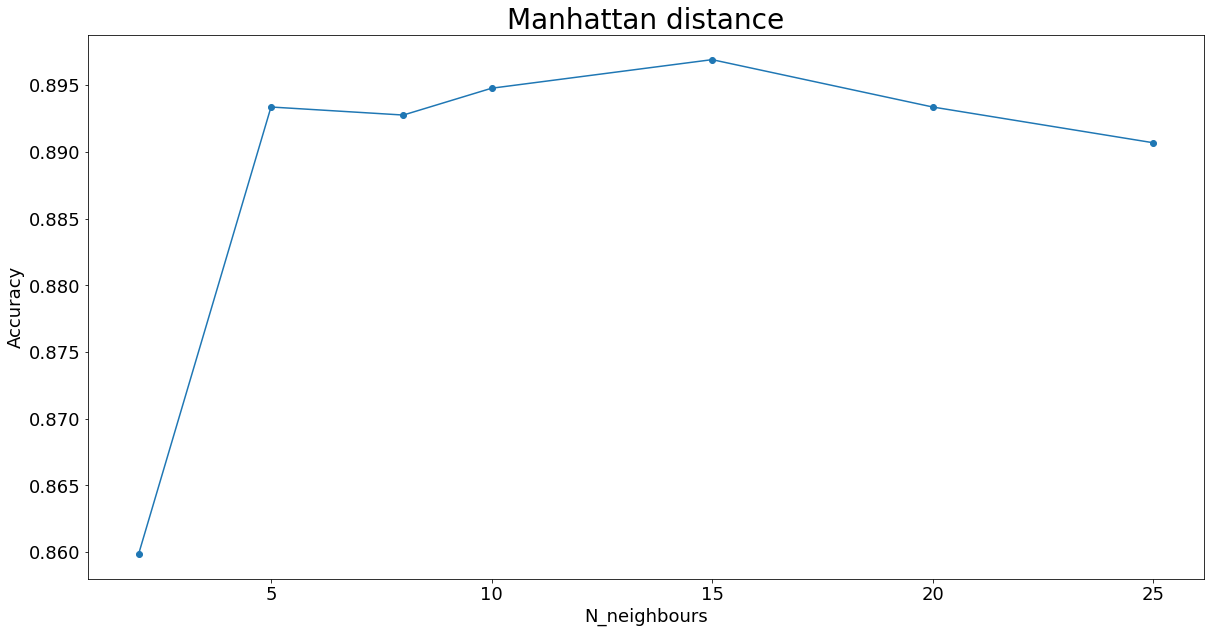

In [32]:
print(man_acc_list)
plt.figure(figsize=[20,10])
plt.plot(K_list, man_acc_list)
plt.scatter(K_list,man_acc_list)
plt.xlabel("N_neighbours",fontdict={'size':18})
plt.ylabel("Accuracy",fontdict={'size':18})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Manhattan distance",fontsize=28)
plt.show()

## Euclidean distance (p=2)

In [20]:
knn_euclid = KNeighborsClassifier(n_neighbors=5,p=2)

In [21]:
knn_euclid.fit(PCA_reduced_x_train, PCA_reduced_y_train)

D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [22]:
Y_pred_euclid = knn_euclid.predict(PCA_reduced_x_test)
print("Accuracy:",metrics.accuracy_score(PCA_reduced_y_test, Y_pred_euclid))

Accuracy: 0.8945676200683234


In [36]:
euclid_acc_list=[]
for K in K_list:
    knn_euclid = KNeighborsClassifier(n_neighbors=K,p=2)
    knn_euclid.fit(PCA_reduced_x_train, PCA_reduced_y_train)
    Y_pred_euclid = knn_euclid.predict(PCA_reduced_x_test)
    euclid_acc_list.append(metrics.accuracy_score(PCA_reduced_y_test, Y_pred_euclid))
    print("n_neighbours||K: ",K,"Accuracy:",euclid_acc_list[-1])

D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbours||K:  2 Accuracy: 0.8610087748677071


D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbours||K:  5 Accuracy: 0.8945676200683234


D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbours||K:  8 Accuracy: 0.8961082456962958


D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbours||K:  10 Accuracy: 0.8975149038783575


D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbours||K:  15 Accuracy: 0.8983856922767768


D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbours||K:  20 Accuracy: 0.8959742782503851


D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbours||K:  25 Accuracy: 0.895103489851966


[0.8610087748677071, 0.8945676200683234, 0.8961082456962958, 0.8975149038783575, 0.8983856922767768, 0.8959742782503851, 0.895103489851966]


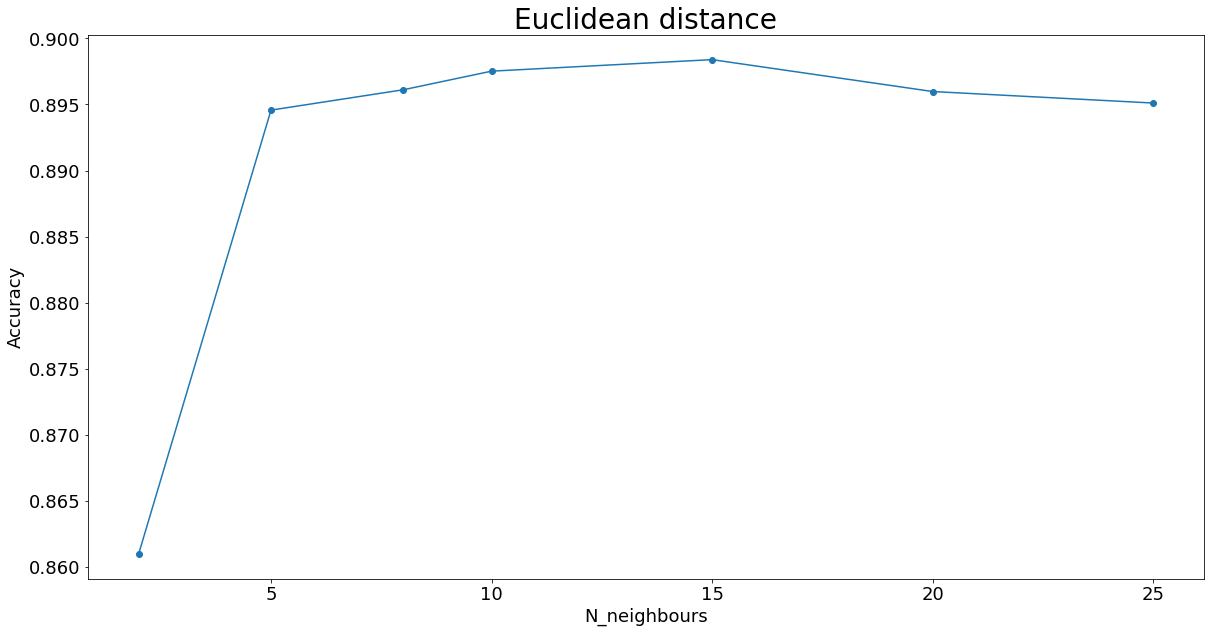

In [37]:
print(euclid_acc_list)
plt.figure(figsize=[20,10])
plt.plot(K_list, euclid_acc_list)
plt.scatter(K_list,euclid_acc_list)
plt.xlabel("N_neighbours",fontdict={'size':18})
plt.ylabel("Accuracy",fontdict={'size':18})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Euclidean distance",fontsize=28)
plt.show()

## Chebyshev distance (p= positive infinity)

In [23]:
from sklearn.neighbors import DistanceMetric

In [24]:
cheb_metric=DistanceMetric.get_metric('chebyshev')

In [25]:
knn_cheb = KNeighborsClassifier(n_neighbors=5,metric='chebyshev')

In [26]:
knn_cheb.fit(PCA_reduced_x_train, PCA_reduced_y_train)
Y_pred_cheb = knn_cheb.predict(PCA_reduced_x_test)
print("Accuracy:",metrics.accuracy_score(PCA_reduced_y_test, Y_pred_cheb))

D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.8709893495880501


In [38]:
cheb_acc_list=[]
for K in K_list:
    knn_cheb = KNeighborsClassifier(n_neighbors=K,metric='chebyshev')
    knn_cheb.fit(PCA_reduced_x_train, PCA_reduced_y_train)
    Y_pred_cheb = knn_cheb.predict(PCA_reduced_x_test)
    cheb_acc_list.append(metrics.accuracy_score(PCA_reduced_y_test, Y_pred_cheb))
    print("n_neighbours||K: ",K,"Accuracy:",cheb_acc_list[-1])

D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbours||K:  2 Accuracy: 0.8308660995378123


D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbours||K:  5 Accuracy: 0.8709893495880501


D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbours||K:  8 Accuracy: 0.8732667961685311


D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbours||K:  10 Accuracy: 0.8720610891553352


D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbours||K:  15 Accuracy: 0.8729318775537545


D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbours||K:  20 Accuracy: 0.8690468216223458


D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbours||K:  25 Accuracy: 0.8684439681157479


[0.8308660995378123, 0.8709893495880501, 0.8732667961685311, 0.8720610891553352, 0.8729318775537545, 0.8690468216223458, 0.8684439681157479]


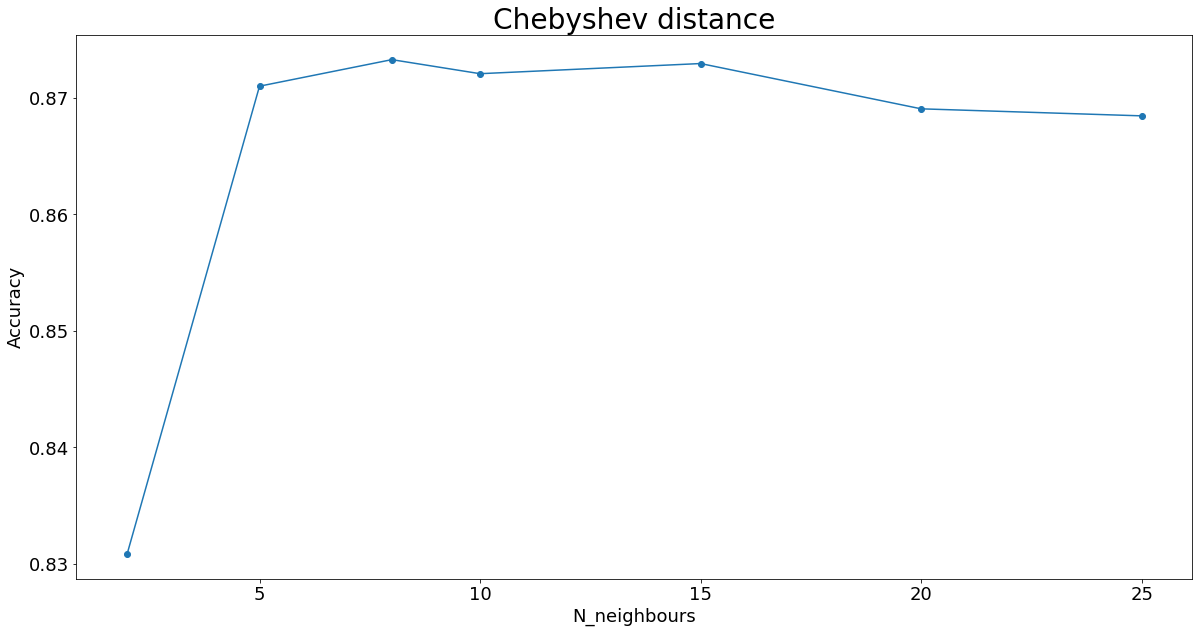

In [39]:
print(cheb_acc_list)
plt.figure(figsize=[20,10])
plt.plot(K_list, cheb_acc_list)
plt.scatter(K_list,cheb_acc_list)
plt.xlabel("N_neighbours",fontdict={'size':18})
plt.ylabel("Accuracy",fontdict={'size':18})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Chebyshev distance",fontsize=28)
plt.show()

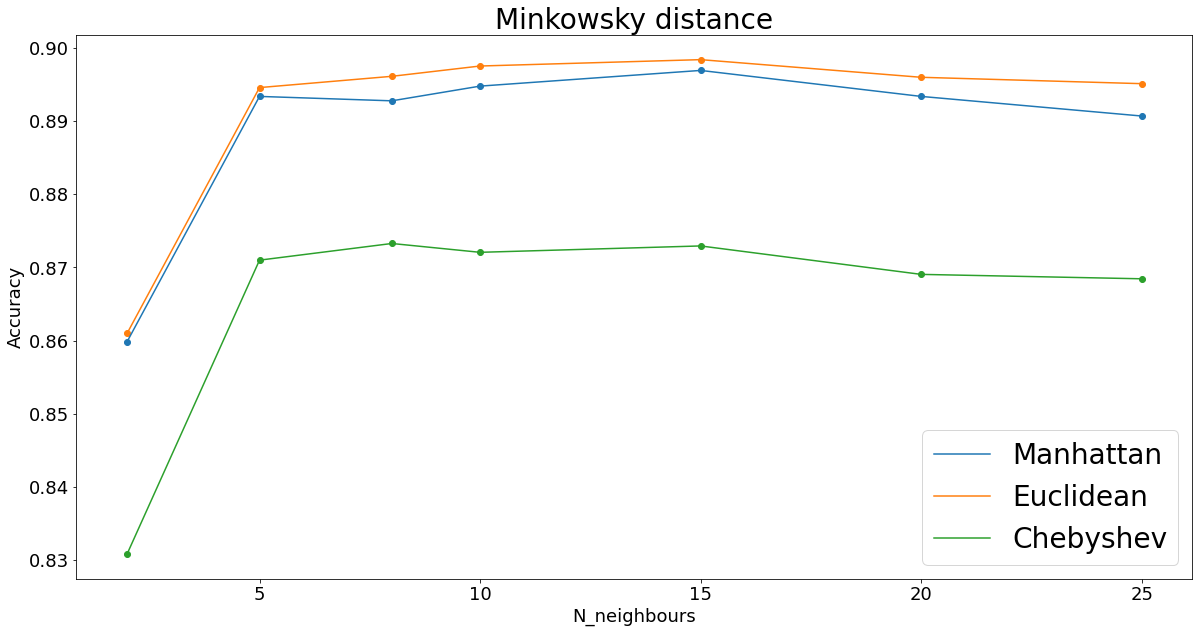

In [44]:
plt.figure(figsize=[20,10])
plt.plot(K_list, man_acc_list)
plt.scatter(K_list, man_acc_list)
plt.plot(K_list, euclid_acc_list)
plt.scatter(K_list,euclid_acc_list)
plt.plot(K_list, cheb_acc_list)
plt.scatter(K_list,cheb_acc_list)
plt.xlabel("N_neighbours",fontdict={'size':18})
plt.ylabel("Accuracy",fontdict={'size':18})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Minkowsky distance",fontsize=28)
plt.legend(['Manhattan','Euclidean','Chebyshev'],fontsize=28)
plt.show()

## Cosine Similarity
Note that in order to be used within the BallTree, the distance must be a true metric: i.e. it must satisfy the following properties
* Non-negativity: d(x, y) >= 0
* Identity: d(x, y) = 0 if and only if x == y
* Symmetry: d(x, y) = d(y, x)
* Triangle Inequality: d(x, y) + d(y, z) >= d(x, z)

Note: Because of the Python object overhead involved in calling the python function, **this will be fairly slow**, but it will have the same scaling as other distances.

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

In [46]:
def custom_dist(x,y):
    cosine_similarity=np.dot(x,y)/(np.multiply(np.sqrt(np.sum(np.square(x))),np.sqrt(np.sum(np.square(y)))))
    return (1-cosine_similarity)*0.5

In [47]:
x=PCA_reduced_x_train[0]
y=PCA_reduced_x_train[1]

In [55]:
custom_dist(x,y)

0.5784851125169888

In [47]:
knn_cs = KNeighborsClassifier(n_neighbors=5,metric=custom_dist,n_jobs=8)

In [48]:
knn_cs.fit(PCA_reduced_x_train, PCA_reduced_y_train)

D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric=<function custom_dist at 0x00000177D4D191E0>,
                     n_jobs=8)

In [49]:
Y_pred_cs = knn_cs.predict(PCA_reduced_x_test)
print("Accuracy:",metrics.accuracy_score(PCA_reduced_y_test, Y_pred_cs))

Accuracy: 0.8910844664746467


# 2nd. Supervised Learning (use reduced dimension: 50)
**Goal**:
The goal in Supervised Learning is to learn a distance metric that puts points with the same label close together while pushing away points with different labels. That is to say, transform points in a new space, in which the distance between two points from the sam e class will be small, and the distance between two points from different classes will be large.

**Data**:
The algorithm has access to a set of data points, each of them belonging to a class (label) as in a standard classification problem.

# 2.1  LMNN

**How does LMNN works:**

LMNN learns a **Mahalanobis distance metric** in the KNN classification setting. The learned metric attempts to keep close k-nearest neighbors from the same class, while keeping examples from different classes separated by a large margin. This algorithm makes no assumptions about the distribution of the data.

**Mahalanobis distances**:

$D(x, x') = \sqrt{(x-x')^\top M(x-x')}$ 

Mahalanobis distance is a Euclidean distance after a linear transformation of the feature space defined by L (taking L to be the identity matrix recovers the standard Euclidean distance). Mahalanobis distance metric learning can thus be seen as learning a new embedding space of dimension num_dims. Note that when num_dims is smaller than n_features, this achieves dimensionality reduction.
    
**Optimization Goal:**

$\min_\mathbf{L}\sum_{i, j}\eta_{ij}||\mathbf{L(x_i-x_j)}||^2 +
c\sum_{i, j, l}\eta_{ij}(1-y_{ij})[1+||\mathbf{L(x_i-x_j)}||^2-||
\mathbf{L(x_i-x_l)}||^2]_+)$

**Brief Explanation:**
$x_i$  is a data point, $x_j$ is one of its k-nearest neighbors sharing the same label, and $x_l$ are all the other instances within that region with different labels, $η_{ij}$,$y_{ij}$∈{0,1} are both the indicators, $η_{ij}$ represents $x_j$ is the k-nearest neighbors (with same labels) of $x_i$, $y_{ij}$=0 indicates $x_i$,$x_j$ belong to different classes, [⋅]+=max(0,⋅) is the Hinge loss.
Intuition: keep close k-nearest neighbors from the same class (first item in the Optimization Goal need to be small), while keeping examples from different classes separated by a large margin(second item in the Optimization Goal need to be small)

In [6]:
from metric_learn import LMNN    # pip install metric-learn

In [12]:
lmnn = LMNN(k=3, learn_rate=1e-6)   # Hyper parameters: k, learn_rate         --> k=3 || 5 will reach the optimal results
lmnn.fit(PCA_reduced_x_train, PCA_reduced_y_train)

D:\anaconda\envs\AI_1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LMNN(learn_rate=1e-06)

In [20]:
lmnn_metric=lmnn.get_metric()
knn_lmnn = KNeighborsClassifier(n_neighbors=5,metric=lmnn_metric)
knn_lmnn.fit(PCA_reduced_x_train, PCA_reduced_y_train)

D:\anaconda\envs\AI_1\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [21]:
Y_pred_lmnn = knn_lmnn.predict(PCA_reduced_x_test)
print("Accuracy:",metrics.accuracy_score(PCA_reduced_y_test, Y_pred_lmnn))

Accuracy: 0.8951704735749213


# 2.2 NCA
**How does NCA works:**

NCA aims to improve the accuracy of nearest neighbors classification compared to the standard Euclidean distance.    
    
**Optimization Goal:**

$\mathbf{L} = \text{argmax}\sum_i p_i$, where $p_i$ represents probability that $x_i$ will be correctly classified by the stochastic nearest neighbors rule. The $p_i$ is calculated by: $p_{i} = \sum_{j:j\neq i, y_j=y_i}p_{ij}$.

$p_{ij}$ represents the probability that $x_i$ is the neighbor of $x_j$.
* $p_{ij} = \frac{\exp(-|| \mathbf{Lx}_i - \mathbf{Lx}_j ||_2^2)}
{\sum_{l\neq i}\exp(-||\mathbf{Lx}_i - \mathbf{Lx}_l||_2^2)},
\qquad$ --> softmax likelihood of the Mahalanobis distance
* $p_{ii}=0$

**Brief Explanation:**
Find matrix L that maximizes the sum of probability of being correctly classified

In [6]:
from metric_learn import NCA

In [7]:
nca = NCA(max_iter=1000)   # Hyper parameters  --> by default

In [ ]:
nca.fit(PCA_reduced_x_train, PCA_reduced_y_train)

In [ ]:
nca_metric=nca.get_metric()
knn_nca = KNeighborsClassifier(n_neighbors=5)
knn_nca.fit(PCA_reduced_x_train, PCA_reduced_y_train)

In [ ]:
Y_pred_lmnn = knn_nca.predict(PCA_reduced_x_test)
print("Accuracy:",metrics.accuracy_score(PCA_reduced_y_test, Y_pred_nca))

# 2.3 LFDA
**How does LFDA works:**

LFDA is a linear supervised dimensionality reduction method which effectively combines the ideas of **Linear Discriminant Analysis and Locality-Preserving Projection**.
    
**Optimization Goal:**

$\mathbf{L}_{LFDA} = \arg\max_\mathbf{L}
[\text{tr}((\mathbf{L}^T\mathbf{S}^{(w)}
\mathbf{L})^{-1}\mathbf{L}^T\mathbf{S}^{(b)}\mathbf{L})]$

Intuition: Looking for a transformation matrix L such that nearby data pairs in the same class are made close and the data pairs in different classes are separated from each other. It is solved as a generalized eigenvalue problem.(like SVD)

* Fisher local within class scatter matrix: \mathbf{S}^{(w)}
* Fisher local between class scatter matrix: \mathbf{S}^{(b)}

$\begin{split}\mathbf{S}^{(w)} = \frac{1}{2}\sum_{i,j=1}^nW_{ij}^{(w)}(\mathbf{x}_i -
\mathbf{x}_j)(\mathbf{x}_i - \mathbf{x}_j)^T,\\
\mathbf{S}^{(b)} = \frac{1}{2}\sum_{i,j=1}^nW_{ij}^{(b)}(\mathbf{x}_i -
\mathbf{x}_j)(\mathbf{x}_i - \mathbf{x}_j)^T,\\\end{split}$

where: $\begin{split}W_{ij}^{(w)} = \left\{\begin{aligned}0 \qquad y_i\neq y_j \\
\,\,\mathbf{A}_{i,j}/n_l \qquad y_i = y_j\end{aligned}\right.\\
W_{ij}^{(b)} = \left\{\begin{aligned}1/n \qquad y_i\neq y_j \\
\,\,\mathbf{A}_{i,j}(1/n-1/n_l) \qquad y_i = y_j\end{aligned}\right.\\\end{split}$

**Brief Explanation:** $A_{i,j}$  is the (i,j)-th entry of the affinity matrix A:, which can be calculated with local scaling methods, $n,\ n_l$ are the total number of points and the number of points per cluster $l$ respectively.

Note:It is particularly useful when dealing with multi-modality, where one ore more classes consist of separate clusters in input space.


In [17]:
from metric_learn import LFDA

In [19]:
lfda = LFDA(k=7,n_components=49)  # Hps: k,n_components

In [ ]:
lfda.fit(PCA_reduced_x_train, PCA_reduced_y_train)

In [ ]:
lfda_metric=mlkr.get_metric()
knn_lfda = KNeighborsClassifier(n_neighbors=5)
knn_lfda.fit(PCA_reduced_x_train, PCA_reduced_y_train)

# 2.4 MLKR
**How does MLKR works:**

MLKR learns a distance function by directly minimizing the leave-one-out regression error.

**Optimization Goal:**

$\mathcal{L} = \sum_i(y_i - \hat{y}_i)^2$

$\hat{y}_i = \frac{\sum_{j\neq i}y_jk_{ij}}{\sum_{j\neq i}k_{ij}}$  

where:

$k_{ij} = \frac{1}{\sqrt{2\pi}\sigma}\exp(-\frac{d(\mathbf{x}_i,
\mathbf{x}_j)}{\sigma^2}),\quad $ $where\ d(\mathbf{x}_i,
\mathbf{x}_j) = ||\mathbf{L}(\mathbf{x}_i - \mathbf{x}_j)||$

the transition matrix $\mathbf{L}$ is derived from the decomposition of Mahalanobis matrix: $\mathbf{M=L^TL}$

**Brief Explanation:** MLKR can be viewed as a supervised variation of PCA that calculates y_predict through a weighted average of all the training samples from kernel regression.

Note: Theoretically, MLKR can be applied with many types of kernel functions and distance metrics, here we just focus the exposition on a particular instance of the Gaussian kernel and Mahalanobis metric

In [13]:
from metric_learn import MLKR

In [15]:
mlkr = MLKR()

In [ ]:
nca.fit(PCA_reduced_x_train, PCA_reduced_y_train)

In [ ]:
mlkr_metric=mlkr.get_metric()
knn_mlkr = KNeighborsClassifier(n_neighbors=5)
knn_mlkr.fit(PCA_reduced_x_train, PCA_reduced_y_train)

# 3rd. Weakly Supervised Learning

**Type:**:
* Learning on Pairs
* Learning on Triplets
* Learning on Quadruplets

Note: Here we use the preprocessor to get the target input representations (pair,triplet or quadruplets) from the original input representation(array-like). But if a classical input is provided, the metric learner will not use the preprocessor.

**Goal**:
A classic example of weaker supervision is a set of positive and negative pairs: in this case, the goal is to learn a distance metric that puts positive pairs close together and negative pairs far away.

**Data**:
The algorithm has access to a set of data points with supervision only at the **tuple level** (typically pairs, triplets, or quadruplets of data points)

# Learning on pairs
In this case, one should provide the algorithm with n_samples pairs of points, with a corresponding target containing n_samples values being either +1 or -1. These values indicate whether the given pairs are **similar points or dissimilar points.**

# 3.1 ITML 
**How does ITML works:**

ITML minimizes the (differential) relative entropy, aka Kullback–Leibler divergence, between two multivariate Gaussians subject to constraints on the associated Mahalanobis distance, which can be formulated into a Bregman optimization problem by minimizing the LogDet divergence subject to linear constraints.

    
**Optimization Goal:**

minimize: $\textbf{KL}(p(\mathbf{x};
\mathbf{M}_0) || p(\mathbf{x}; \mathbf{M})),\ where \\
p(\mathbf{x}; \mathbf{M}) = \frac{1}{Z}\exp(-\frac{1}{2}d_\mathbf{M}
(\mathbf{x}, \mu))
=  \frac{1}{Z}\exp(-\frac{1}{2}((\mathbf{x} - \mu)^T\mathbf{M}
(\mathbf{x} - \mu))
$
Note: $\mathbf{Z}$ is the normalization constant, the inverse of Mahalanobis matrix $\mathbf{M}^{-1}$ is the covariance of the Gaussian.


By formulated KL divergence into a Bregman optimization problem,we can get an equivalent optimization goal:

$\begin{split}\min_\mathbf{A} D_{\ell \mathrm{d}}\left(M, M_{0}\right) =
\operatorname{tr}\left(M M_{0}^{-1}\right)-\log \operatorname{det}
\left(M M_{0}^{-1}\right)-n\\
\text{subject to } \quad d_\mathbf{M}(\mathbf{x}_i, \mathbf{x}_j)
\leq u \qquad (\mathbf{x}_i, \mathbf{x}_j)\in S \\
d_\mathbf{M}(\mathbf{x}_i, \mathbf{x}_j) \geq l \qquad (\mathbf{x}_i,
\mathbf{x}_j)\in D\end{split}$

where $u$ and $l$ is the upper and the lower bound of distance for similar and dissimilar pairs respectively, and $\mathbf{M_0}$ is the prior distance metric, set to identity matrix by default, $D_{\ell \mathrm{d}}(\cdot)$ is the log determinant. $\mathbf{S}$ is pairs of similar points and $\mathbf{D}$ is pairs of dissimilar points.





**Brief Explanation:**

Unlike some other methods, ITML does not rely on an eigenvalue computation or semi-definite programming. So it can handle a wide variety of constraints and can optionally incorporate a prior on the distance function.

In [1]:
from metric_learn import ITML

In [ ]:
itml = ITML(preprocessor=PCA_reduced_x_train)

# 3.2 SDML
**How does SDML works:**

Double regularization: an L1-penalization on the off-diagonal elements of the Mahalanobis matrix $\mathbf{M}$, and a log-determinant divergence between $\mathbf{M}$ and $\mathbf{M_0}$ 
    
**Optimization Goal:**

$\min_{\mathbf{M}} = \text{tr}((\mathbf{M}_0 + \eta \mathbf{XLX}^{T})
\cdot \mathbf{M}) - \log\det \mathbf{M} + \lambda ||\mathbf{M}||_{1, off}$

**Brief Explanation:**

$\mathbf{X}=[\mathbf{x}_1, \mathbf{x}_2, ..., \mathbf{x}_n]$ is the training data (pairs of data). Laplacian matrix $\mathbf{L}=\mathbf{D}-\mathbf{K}$, where $\mathbf{D}$ is a diagonal matrix whose entries are the sums of the row elements of $\mathbf{K}$. Note that $||\cdot||_{1, off}$ is the off-diagonal L1 norm and $\lambda$ is the weight coefficient.

# 3.3 RCA 
**How does RCA works:**

RCA learns a full rank Mahalanobis distance metric based on a weighted sum of in-chunklets covariance matrices. It applies a global linear transformation to assign large weights to relevant dimensions and low weights to irrelevant dimensions. Those relevant dimensions are estimated using “chunklets”, subsets of points that are known to belong to the same class.
    
**Computation Goal:**

simply computes:

$\mathbf{C} = \frac{1}{n}\sum_{j=1}^k\sum_{i=1}^{n_j}
(\mathbf{x}_{ji}-\hat{\mathbf{m}}_j)
(\mathbf{x}_{ji}-\hat{\mathbf{m}}_j)^T$, where n is the number of training points and k is the number of chunklets.

After we calculate $\mathbf{C}$, we can get the inverse $\mathbf{C^{-1}}$ and use it as the Mahalanobis matrix to calculate distance metric as usual.

**Brief Explanation:**

You can view $\mathbf{C}$ as an average sum of chunklets, where each chunklet $j$ is consist of $\{\mathbf{x}_{ji}\}_{i=1}^{n_j}$ and a mean $\hat{m}_j$.

# 3.4 MMC 
**How does MMC works:**

MMC minimizes the sum of squared distances between similar points, while enforcing the sum of distances between dissimilar ones to be greater than one.
    
**Optimization Goal:**

$\min_{\mathbf{M}\in\mathbb{S}_+^d}\sum_{(\mathbf{x}_i,
\mathbf{x}_j)\in S} d_{\mathbf{M}}(\mathbf{x}_i, \mathbf{x}_j)
\\ \text{s.t.} \qquad \sum_{(\mathbf{x}_i, \mathbf{x}_j)
\in D} d^2_{\mathbf{M}}(\mathbf{x}_i, \mathbf{x}_j) \geq 1$

**Brief Explanation:**

MMC's optimization goal leads to a convex function. And we know that local-minima-free optimization problem that can be solved efficiently, so this is an advantage of MMC. However, the algorithm involves the computation of eigenvalues, which is the main speed-bottleneck. Since it has initially been designed for clustering applications, one of the implicit assumptions of MMC is that all classes form a compact set, i.e., follow a unimodal distribution, which restricts the possible use-cases of this method.

# Learning on triplets
In this case, one should provide the algorithm with n_samples triplets of points. The semantic of each triplet is that the **first point should be closer to the second point than to the third one.**

# 3.5 SCML 
**How does SCML works:**

SCML learns a squared Mahalanobis distance from triplet constraints by optimizing sparse positive weights assigned to a set of K rank-one PSD bases. This can be formulated as an optimization problem with only K parameters.
    
**Optimization Goal:**

$\min_{w\geq 0} \sum_{(x_i,x_j,x_k)\in C} [1 + d_w(x_i,x_j)-d_w(x_i,x_k)]_+ + \beta||w||_1$, where 

$d_w(x_i,x_j)$ is the Mahalanobis distance. Mahalanobis matrix is calculated by:

$M = \sum_{i=1}^K w_i b_i b_i^T = B \cdot diag(w) \cdot B^T \quad w_i \geq 0 \\ $

**Brief Explanation:**

$\mathbf{C}$ is the set of triplets where $(x_i,x_j,x_k)$ is one triplet. $\beta||w||_1$ is a L1 regularization and $[\cdot]_+$ is the hinge loss. 

The Mahalanobis matrix $\mathbf{M}$ is built from a basis set $B = \{b_i\}_{i=\{1,...,K\}}$ weighted by a K dimensional vector $w = \{w_i\}_{i=\{1,...,K\}}$. Note that $w$ are sparse positive weights of K dimension and $B$ is K rank-one PSD bases. The optimization problem of $w$ is solved with an efficient stochastic composite scheme.

# Learning on Quadruplets
In this case, one should provide the algorithm with n_samples quadruplets of points. The semantic of each quadruplet is that **the first two points should be closer together than the last two points.**

# 3.6 LSML 
**How does LSML works:**

It minimizes a convex objective function corresponding to the sum of squared residuals of constraints. 
    
**Optimization Goal:**

minimizing the summed loss function of all constraints plus a regularization term:

$\begin{split}\min_\mathbf{M}(D_{ld}(\mathbf{M, M_0}) + \sum_{(\mathbf{x}_i,
\mathbf{x}_j, \mathbf{x}_k, \mathbf{x}_l)\in C}H(d_\mathbf{M}(
\mathbf{x}_i, \mathbf{x}_j) - d_\mathbf{M}(\mathbf{x}_k, \mathbf{x}_l))\\\end{split}$

where $D_{ld}(\mathbf{\cdot, \cdot})$ is the LogDet divergence: $
D_{ld}(\mathbf{M, M_0}) = \text{tr}(\mathbf{MM_0}) − \text{logdet}
(\mathbf{M}) $ and $\mathbf{M_0}$ is the prior metric matrix ( in the code we set it as identity by default).

$
C = \{(\mathbf{x}_i , \mathbf{x}_j , \mathbf{x}_k , \mathbf{x}_l)
: d(\mathbf{x}_i , \mathbf{x}_j) < d(\mathbf{x}_k , \mathbf{x}_l)\}$ is the constraint set,

where we calculate the loss $H(d_\mathbf{M}(\mathbf{x}_i, \mathbf{x}_j) - d_\mathbf{M}(\mathbf{x}_k, \mathbf{x}_l))$ for each of the constrains $d(\mathbf{x}_i, \mathbf{x}_j) < d(\mathbf{x}_k, \mathbf{x}_l)$ in $\mathbf{C}$.
Here $H(\cdot)$ is the squared Hinge loss function defined as: $\begin{split}H(x) = \left\{\begin{aligned}0 \qquad x\leq 0 \\
\,\,x^2 \qquad x>0\end{aligned}\right.\\\end{split}$

**Brief Explanation:**

LSML uses the constraints in the form of the relative distance comparisons. Thus, it is especially useful where pairwise constraints are not natural to obtain, where pairwise constraints based algorithms become infeasible to be deployed. Furthermore, its sparsity extension leads to more stable estimation when the dimension is high and only a small amount of constraints is given. 

Note that the original paper suggested summed loss function $L(C)$ should be a weighted sum since the confidence or probability of each constraint might differ. However, for the sake of simplicity and assumption of no extra knowledge provided, we just deploy the simple sum here.